In [2]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
Spots = pd.read_csv('Spots_new.csv', sep = ',')

In [4]:
Spots

Date  Spots
0      1950-01-01  143.0
1      1950-01-02  142.0
2      1950-01-03  130.0
3      1950-01-04  119.0
4      1950-01-05  108.0
...           ...    ...
22469  2020-01-28   12.0
22470  2020-01-29   12.0
22471  2020-01-30   12.0
22472  2020-01-31   12.0
22473  2020-02-01   11.0

[22474 rows x 2 columns]

In [5]:
CME = pd.read_csv('CME_new.csv', sep = ',')

In [6]:
CME

Date  Central_PA  Width  2_I_speed  2_F_speed  2_20R_speed  \
0     1996-01-22       105.0   37.0      401.0      130.0        372.0   
1     1996-01-26        90.0   27.0      254.0      271.0        322.0   
2     1996-01-31       274.0   47.0      219.0       99.0        322.0   
3     1996-02-03        83.0   52.0      294.0      317.0        309.0   
4     1996-02-08       263.0   70.0      247.0      126.0        309.0   
...          ...         ...    ...        ...        ...          ...   
5940  2019-12-11       112.0   50.0       85.0      233.0        243.0   
5941  2019-12-17       284.0   53.0      148.0      207.0        440.0   
5942  2019-12-24       282.0   57.0      157.0      288.0        615.0   
5943  2019-12-27       293.0   33.5      275.0      592.0       1086.0   
5944  2019-12-30       266.5   61.0       20.5      132.0        222.5   

          K_energy    MPA  
0     2.500000e+28  103.0  
1     1.000000e+29   90.0  
2     3.200000e+28  272.0  
3     8.900000e+29   80.0  
4     2.700000e+28  249.0  
...            ...    ...  
5940  3.300000e+27  116.0  
5941  7.100000e+27  288.0  
5942  1.500000e+28  289.0  
5943  3.550000e+28  292.5  
5944  2.795000e+28  260.0  

[5945 rows x 8 columns]

In [7]:
Flares = pd.read_csv('Flares_new.csv', sep = ',')

In [8]:
Flares

Date  Background_energy   Peak_energy  Integrated_energy  \
0     1992-07-01       9.500000e-09  3.923810e-08           0.000700   
1     1992-07-02       9.212500e-09  4.200000e-08           0.000680   
2     1992-07-03       7.000000e-09  2.300000e-06           0.056000   
3     1992-07-04       6.625000e-09  2.190000e-07           0.001245   
4     1992-07-05       4.217500e-08  7.346875e-07           0.008944   
...          ...                ...           ...                ...   
6190  2016-12-26       9.225000e-08  4.375000e-07           0.000213   
6191  2016-12-27       7.800000e-08  2.066667e-07           0.000229   
6192  2016-12-29       7.700000e-08  1.300000e-07           0.000049   
6193  2016-12-30       8.300000e-08  1.600000e-07           0.000096   
6194  2016-12-31       1.000000e-07  2.100000e-07           0.001295   

             Dur  
0       6.809524  
1       6.500000  
2      60.000000  
3       6.500000  
4      11.875000  
...          ...  
6190   14.000000  
6191   20.333333  
6192    9.000000  
6193   11.500000  
6194  111.500000  

[6195 rows x 5 columns]

In [9]:
Spots_CME = pd.merge(left = Spots, right = CME, left_on = 'Date', right_on = 'Date')

In [10]:
Spots_CME

Date  Spots  Central_PA  Width  2_I_speed  2_F_speed  2_20R_speed  \
0     1996-01-26   10.0        90.0   27.0      254.0      271.0        322.0   
1     1996-01-31   13.0       274.0   47.0      219.0       99.0        322.0   
2     1996-02-03   12.0        83.0   52.0      294.0      317.0        309.0   
3     1996-03-06   19.0       268.0   55.0      141.0      232.0        215.0   
4     1996-03-07   12.0        57.0   39.0      235.0      169.0        135.0   
...          ...    ...         ...    ...        ...        ...          ...   
5105  2019-08-05    8.0        75.0   23.0      431.0      222.0        136.0   
5106  2019-09-01   14.0        92.0   38.0      170.0      316.0        559.0   
5107  2019-10-01    7.0        95.0   55.0      321.0       83.0        300.0   
5108  2019-11-13    3.0       277.0   42.0      118.0      200.0        483.0   
5109  2019-12-24   16.0       282.0   57.0      157.0      288.0        615.0   

          K_energy    MPA  
0     1.000000e+29   90.0  
1     3.200000e+28  272.0  
2     8.900000e+29   80.0  
3     5.600000e+27  261.0  
4     7.500000e+28   53.0  
...            ...    ...  
5105  8.100000e+26   77.0  
5106  4.900000e+28   97.0  
5107  5.400000e+26   90.0  
5108  9.500000e+27  284.0  
5109  1.500000e+28  289.0  

[5110 rows x 9 columns]

In [11]:
Spots_CME_Flares = pd.merge(left = Spots_CME, right = Flares, left_on = 'Date', right_on = 'Date')

In [12]:
Spots_CME_Flares

Date  Spots  Central_PA  Width  2_I_speed   2_F_speed  \
0     1996-01-31   13.0  274.000000   47.0      219.0   99.000000   
1     1996-03-11   22.0   86.000000   52.0      124.0  352.000000   
2     1996-03-14   18.0  285.000000   59.0      526.0  307.000000   
3     1996-05-06   15.0   88.000000   73.0      496.0  360.000000   
4     1996-05-11   25.0  268.000000   58.0      467.0  485.000000   
...          ...    ...         ...    ...        ...         ...   
3814  2016-12-21   30.0   90.000000   93.0       64.0  351.000000   
3815  2016-12-27   16.0  236.000000   33.0       79.0  284.000000   
3816  2016-12-29   11.0   48.000000   20.0      112.0  180.000000   
3817  2016-12-30   11.0  136.000000   34.5      250.0  419.000000   
3818  2016-12-31   11.0   74.666667   33.0      305.0  423.333333   

      2_20R_speed      K_energy    MPA  Background_energy   Peak_energy  \
0      322.000000  3.200000e+28  272.0       3.260000e-08  1.860000e-07   
1      656.000000  1.300000e+29   77.0       7.761111e-08  5.227778e-07   
2      302.000000  1.000000e+30  292.0       2.550000e-08  1.600000e-07   
3      404.000000  2.500000e+30   83.0       9.200000e-08  7.800000e-07   
4      489.000000  5.500000e+29  269.0       6.487500e-08  4.250000e-07   
...           ...           ...    ...                ...           ...   
3814   306.000000  8.200000e+29   84.0       7.100000e-08  2.700000e-07   
3815   430.000000  2.700000e+28  239.0       7.800000e-08  2.066667e-07   
3816   370.000000  5.900000e+27   55.0       7.700000e-08  1.300000e-07   
3817   518.500000  3.850000e+29  143.5       8.300000e-08  1.600000e-07   
3818   931.333333  1.081667e+29   79.0       1.000000e-07  2.100000e-07   

      Integrated_energy         Dur  
0              0.000096   10.000000  
1              0.000317   12.111111  
2              0.000035    6.000000  
3              0.000687   24.666667  
4              0.000323   18.375000  
...                 ...         ...  
3814           0.000150   14.000000  
3815           0.000229   20.333333  
3816           0.000049    9.000000  
3817           0.000096   11.500000  
3818           0.001295  111.500000  

[3819 rows x 13 columns]

In [13]:
SCF = Spots_CME_Flares

In [14]:
SCF.to_csv('SCF.csv', index = False)

In [15]:
sp=SCF

In [16]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3819 entries, 0 to 3818
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3819 non-null   object 
 1   Spots              3819 non-null   float64
 2   Central_PA         3819 non-null   float64
 3   Width              3819 non-null   float64
 4   2_I_speed          3819 non-null   float64
 5   2_F_speed          3819 non-null   float64
 6   2_20R_speed        3819 non-null   float64
 7   K_energy           3819 non-null   float64
 8   MPA                3819 non-null   float64
 9   Background_energy  3819 non-null   float64
 10  Peak_energy        3819 non-null   float64
 11  Integrated_energy  3819 non-null   float64
 12  Dur                3819 non-null   float64
dtypes: float64(12), object(1)
memory usage: 417.7+ KB


In [17]:
sp.describe()

Spots   Central_PA        Width    2_I_speed    2_F_speed  \
count  3819.000000  3819.000000  3819.000000  3819.000000  3819.000000   
mean     92.605656   183.174891    67.057744   358.119336   387.096156   
std      59.969497    69.009643    37.003848   164.447102   144.530686   
min       6.000000     1.000000    11.000000    10.000000    10.000000   
25%      45.000000   134.450000    43.666667   241.000000   290.000000   
50%      79.000000   184.333333    58.833333   334.750000   374.500000   
75%     130.000000   233.633333    80.000000   455.598039   471.000000   
max     343.000000   360.000000   360.000000  1037.500000   995.000000   

       2_20R_speed      K_energy          MPA  Background_energy  \
count  3819.000000  3.819000e+03  3819.000000       3.819000e+03   
mean    524.902505  1.403211e+30   180.566161       6.371989e-07   
std     203.645645  2.004320e+30    68.808969       6.135720e-07   
min      21.000000  2.400000e+25     3.000000       3.700000e-09   
25%     385.071429  1.153333e+29   130.291667       1.933333e-07   
50%     500.142857  5.127143e+29   181.400000       4.675000e-07   
75%     627.633333  1.772825e+30   231.000000       8.680128e-07   
max    1395.000000  9.900000e+30   359.000000       4.600000e-06   

        Peak_energy  Integrated_energy          Dur  
count  3.819000e+03        3819.000000  3819.000000  
mean   2.763158e-06           0.002646    19.197172  
std    4.937071e-06           0.006937    15.175042  
min    1.000000e-07           0.000022     4.000000  
25%    5.654167e-07           0.000375    11.363636  
50%    1.400000e-06           0.001100    15.375000  
75%    3.099286e-06           0.002789    21.500000  
max    1.288000e-04           0.235325   225.500000

In [17]:
import altair as alt

In [22]:
year = alt.Chart(sp).mark_line(color='red').encode(
    x='year(Date):T',
    y='mean(Spots)',
    
)

yearmonth = alt.Chart(sp).mark_line(color='green').encode(
    x='yearmonth(Date):T',
    y='mean(Spots)',

)

yearmonthday = alt.Chart(sp).mark_line(color='blue').encode(
    x='Date:T',
    y='mean(Spots)'

)

In [23]:
year & yearmonth | yearmonthday

alt.HConcatChart(...)

In [28]:
year = alt.Chart(sp).mark_line(color='red').encode(
    x='year(Date):T',
    y='mean(K_energy)'
    
)

yearmonth = alt.Chart(sp).mark_line(color='green').encode(
    x='yearmonth(Date):T',
    y='mean(K_energy)',

)

yearmonthday = alt.Chart(sp).mark_line(color='blue').encode(
    x='Date:T',
    y='mean(K_energy)'

)

In [29]:
year & yearmonth | yearmonthday

alt.HConcatChart(...)

In [23]:
yearmonth = alt.Chart(sp).mark_point(color='green').encode(
    x='year(Date):T',
    y='mean(Spots)',
    color='Central_PA'
)



In [24]:
yearmonth

alt.Chart(...)

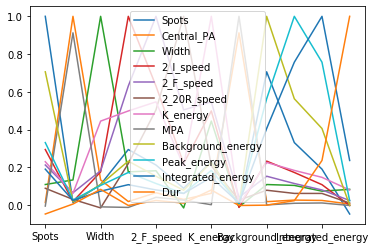

In [25]:
sp.corr().plot()

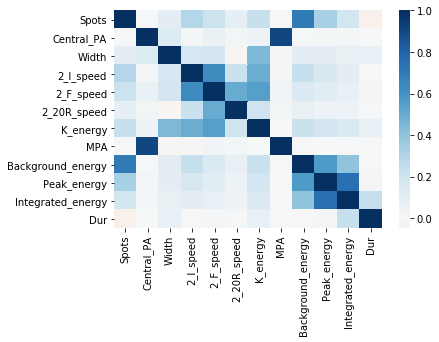

In [26]:
from matplotlib import cm
import seaborn as sns

sns.heatmap(sp.corr(), cmap='RdBu', center=0)


In [31]:
sp.corr()

Spots  Central_PA     Width  2_I_speed  2_F_speed  \
Spots              1.000000    0.020393  0.120886   0.235587   0.182286   
Central_PA         0.020393    1.000000  0.259226   0.136241   0.169166   
Width              0.120886    0.259226  1.000000   0.462641   0.462462   
2_I_speed          0.235587    0.136241  0.462641   1.000000   0.777545   
2_F_speed          0.182286    0.169166  0.462462   0.777545   1.000000   
2_20R_speed        0.086574    0.090476  0.222623   0.436686   0.613416   
Acceleration      -0.075050    0.008604 -0.096114  -0.347427   0.114826   
K_energy           0.013471    0.098219  0.254155   0.341458   0.302095   
MPA               -0.008225    0.871662 -0.003974  -0.003328   0.038520   
Background_energy  0.501013    0.060380  0.155673   0.255034   0.217936   
Peak_energy       -0.007255   -0.000788  0.001316  -0.014520  -0.015412   
Integrated_energy  0.117785    0.078005  0.196292   0.268697   0.266498   
Duration          -0.025134    0.038966  0.079819   0.037395   0.038458   

                   2_20R_speed  Acceleration  K_energy       MPA  \
Spots                 0.086574     -0.075050  0.013471 -0.008225   
Central_PA            0.090476      0.008604  0.098219  0.871662   
Width                 0.222623     -0.096114  0.254155 -0.003974   
2_I_speed             0.436686     -0.347427  0.341458 -0.003328   
2_F_speed             0.613416      0.114826  0.302095  0.038520   
2_20R_speed           1.000000      0.281115  0.220109  0.009479   
Acceleration          0.281115      1.000000 -0.127266  0.035906   
K_energy              0.220109     -0.127266  1.000000  0.000133   
MPA                   0.009479      0.035906  0.000133  1.000000   
Background_energy     0.134318     -0.078136  0.139758  0.010855   
Peak_energy          -0.002051      0.007862 -0.000568  0.007659   
Integrated_energy     0.181300     -0.054313  0.285617  0.015375   
Duration              0.025681     -0.000570  0.022680  0.027465   

                   Background_energy  Peak_energy  Integrated_energy  Duration  
Spots                       0.501013    -0.007255           0.117785 -0.025134  
Central_PA                  0.060380    -0.000788           0.078005  0.038966  
Width                       0.155673     0.001316           0.196292  0.079819  
2_I_speed                   0.255034    -0.014520           0.268697  0.037395  
2_F_speed                   0.217936    -0.015412           0.266498  0.038458  
2_20R_speed                 0.134318    -0.002051           0.181300  0.025681  
Acceleration               -0.078136     0.007862          -0.054313 -0.000570  
K_energy                    0.139758    -0.000568           0.285617  0.022680  
MPA                         0.010855     0.007659           0.015375  0.027465  
Background_energy           1.000000     0.004743           0.465615  0.075382  
Peak_energy                 0.004743     1.000000           0.006264 -0.006732  
Integrated_energy           0.465615     0.006264           1.000000  0.127603  
Duration                    0.075382    -0.006732           0.127603  1.000000

In [1]:
sp

NameError: name 'sp' is not defined